In [1]:
set.seed(1234)

fin = file.path("data", "housing.data")
df = read.table(fin, 
                sep=",", 
                col.names=c("CRIM", 
                           "ZN", 
                           "INDUS", 
                           "CHAS", 
                           "NOX", 
                           "RM", 
                           "AGE", 
                           "DIS", 
                           "RAD", 
                           "TAX", 
                           "PTRATIO", 
                           "B",
                           "LSTAT",
                           "MEDV"))

#str(df)

df$CHAS = as.factor(df$CHAS)
str(df)

'data.frame':	506 obs. of  14 variables:
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num  397 397 393 395 397 ...
 $ LSTAT  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [2]:
# shuffle the rows in our data randomly
df = df[sample(nrow(df)),]
train = df[c(1:400),]
test  = df[c(401:506),]

In [3]:
# use all independent variables
#   Note the CRIM, INDUS, AGE, B appear to have little effect?
model1 = lm(MEDV ~ ., data=train)
summary(model1)


Call:
lm(formula = MEDV ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6243  -2.9500  -0.5499   1.8155  24.8050 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  45.471477   6.057729   7.506 4.24e-13 ***
CRIM         -0.083687   0.050065  -1.672  0.09542 .  
ZN            0.047491   0.015897   2.987  0.00299 ** 
INDUS         0.039260   0.071243   0.551  0.58191    
CHAS1         2.747515   0.969562   2.834  0.00484 ** 
NOX         -19.703295   4.463396  -4.414 1.32e-05 ***
RM            2.946321   0.481168   6.123 2.26e-09 ***
AGE          -0.007292   0.015794  -0.462  0.64457    
DIS          -1.577449   0.226999  -6.949 1.57e-11 ***
RAD           0.324745   0.079210   4.100 5.04e-05 ***
TAX          -0.013243   0.004346  -3.047  0.00247 ** 
PTRATIO      -1.001927   0.154031  -6.505 2.42e-10 ***
B             0.008531   0.003357   2.541  0.01144 *  
LSTAT        -0.564716   0.057058  -9.897  < 2e-16 ***
---
Signif. 

In [4]:
# try another model w/out CRIM, INDUS, AGE, B
model2 = lm(MEDV ~ ZN+CHAS+NOX+RM+DIS+RAD+TAX+PTRATIO+LSTAT, data=train)
summary(model2)


Call:
lm(formula = MEDV ~ ZN + CHAS + NOX + RM + DIS + RAD + TAX + 
    PTRATIO + LSTAT, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.9872  -2.8718  -0.6543   2.0191  25.1688 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  48.968022   5.774913   8.479 4.73e-16 ***
ZN            0.045166   0.015754   2.867  0.00437 ** 
CHAS1         3.057863   0.972225   3.145  0.00179 ** 
NOX         -19.810398   4.128082  -4.799 2.28e-06 ***
RM            2.830447   0.474357   5.967 5.43e-09 ***
DIS          -1.542903   0.212315  -7.267 2.02e-12 ***
RAD           0.250940   0.072908   3.442  0.00064 ***
TAX          -0.012542   0.004055  -3.093  0.00213 ** 
PTRATIO      -0.953186   0.152292  -6.259 1.02e-09 ***
LSTAT        -0.613036   0.052991 -11.569  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.952 on 390 degrees of freedom
Multiple R-squared:  0.7095,	Adjusted R-squared

In [5]:
model1.res = resid(model1)
model2.res = resid(model2)

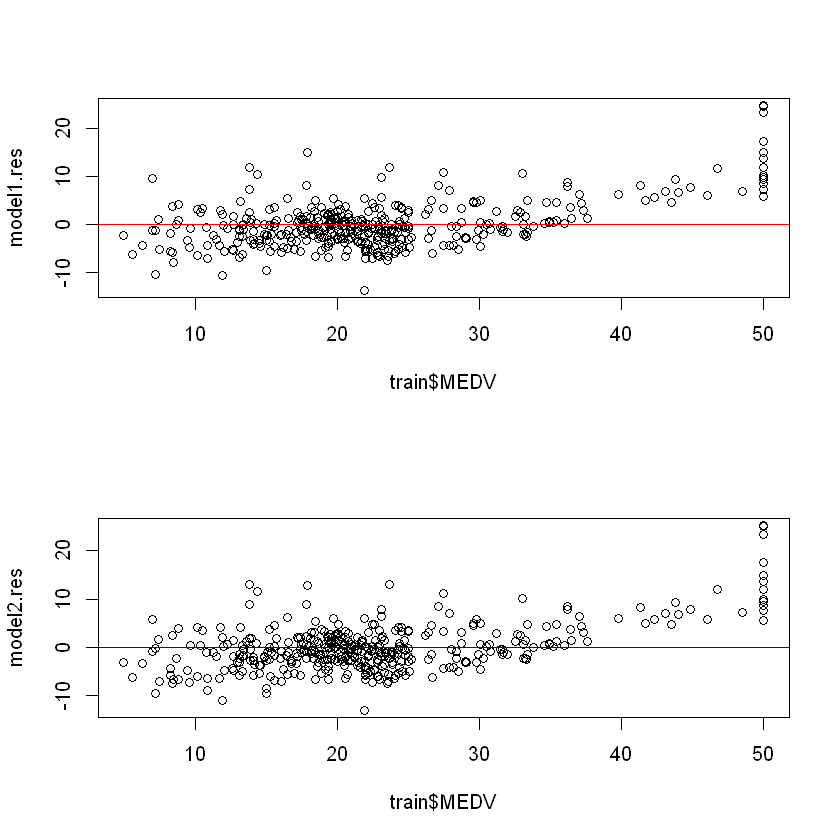

In [6]:
par(mfrow=c(2,1))
plot(train$MEDV, model1.res)
abline(a=0, b=0, col="red")
plot(train$MEDV, model2.res)
abline(a=0, b=0, col="blue")